# Caption


https://realpython.com/python-keras-text-classification/

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../dataset/influencer_dataset.csv')
print("Numero di esempi: ", len(dataset))
dataset.head()

Numero di esempi:  11905


,index,username,photo_id,followed_by,hashtag,tag,caption,is_video,timestamp,n_comment,n_likes,target
0,0,viniciusjunior,viniciusjunior0,9012479,[],[],Obrigado pelo carinho de sempre a todos que ac...,False,1582322398,1043,386524,standard
1,1,viniciusjunior,viniciusjunior1,9012479,[],[],“Algumas pessoas querem que algo aconteça outr...,False,1582141911,1564,522107,standard
2,2,viniciusjunior,NaN,9012479,"['#VOLTAFOOTBALL', '#FIFA20']","['@rodrygogoes', '@dani.carvajal.2', '@fedeeva...",Mi amigo y yo llevamos el equipo a las calles ...,True,1581615465,395,179341,standard
3,3,viniciusjunior,NaN,9012479,[],[],💪🏾,True,1581532095,2303,380096,standard
4,4,viniciusjunior,viniciusjunior4,9012479,[],['@pedroscooby'],Day off 🏄🏼‍♂️ tava pro surf das ondas gigantes...,False,1581440777,895,387117,standard


#### Aggiungo come post sponsorizzati quelli che contengono come hashtag `adv`, `ad` etc.

In [3]:
mask = dataset.hashtag.str.lower().str.contains("'#adv'|'#ad'|'#sponsored'|'#supplied'")
column_name = 'target'
dataset.loc[mask, column_name] = 'paid'
# dataset.loc[mask_adv | mask_sponsored | mask_supplied, column_name] = 'paid'

#### Aggiungo i post dei prend come fossero a pagamento

In [4]:
brand_list = ['victoriassecret', 'nikefootball', 'nike',
        'nikebasketball', 'chanelofficial', 'gucci',
        'zara', 'louisvuitton', 'adidas',
       'adidasfootball', 'adidasoriginals', 'bmw',
       'mercedesbenz', 'kyliecosmetics', 'lamborghini',
       'versace', 'starbucks']
"|".join(brand_list)

'victoriassecret|nikefootball|nike|nikebasketball|chanelofficial|gucci|zara|louisvuitton|adidas|adidasfootball|adidasoriginals|bmw|mercedesbenz|kyliecosmetics|lamborghini|versace|starbucks'

In [5]:
mask = dataset.username.str.lower().str.contains("|".join(brand_list))
column_name = 'target'
dataset.loc[mask, column_name] = 'paid'

#### Trasfromazione etichette in 0-1

In [6]:
# paid = 0
# standard = 1
label = LabelEncoder()
dataset['target'] = label.fit_transform(dataset['target'])

#### Costruzione dataset

In [7]:
X = dataset['caption'].values.astype('U') # U = unicode
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [8]:
print('Esempi training standard: ', sum(y_train == 1))
print('Esempi training paid: ', sum((y_train == 0)))

Esempi training standard:  8564
Esempi training paid:  364


In [9]:
print('Esempi test standard: ', sum(y_test == 1))
print('Esempi test paid: ', sum(y_test == 0))

Esempi test standard:  2856
Esempi test paid:  121


In [10]:
len(X_train), len(X_test)

(8928, 2977)

In [11]:
y_train.value_counts()

1    8564
0     364
Name: target, dtype: int64

In [12]:
y_test.value_counts()

1    2856
0     121
Name: target, dtype: int64

### Vectorized

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train) # creiamo il vocabolario solo con X_train (così X_test è come se non lo avessimo mai visto)
vectorizer.vocabulary_

{'emma': 7283,
 'gellergreen': 9217,
 '16': 153,
 'years': 23455,
 'later': 12440,
 'the': 21251,
 'sheldon': 19387,
 'twins': 21995,
 'and': 1547,
 'swung': 20716,
 'by': 3587,
 'central': 4032,
 'perk': 16203,
 'to': 21482,
 'reflect': 17863,
 'on': 15329,
 'their': 21261,
 'time': 21409,
 'show': 19466,
 'brasilzão': 3313,
 'de': 5788,
 'volta': 22796,
 'no': 14919,
 'feed': 8353,
 'exato': 7941,
 '깡총깡총': 29030,
 'apdm': 1724,
 'allora': 1357,
 'vi': 22569,
 'piaciuta': 16344,
 'io': 11249,
 'ero': 7613,
 'emozionatissimaaaaaa': 7302,
 'da': 5638,
 'stanotte': 20227,
 'sarà': 18778,
 'fuori': 8993,
 'ovunque': 15569,
 'domani': 6732,
 'ore': 15445,
 '10': 26,
 'il': 10750,
 'video': 22615,
 'nan': 14615,
 'наши': 25488,
 'дорогие': 24509,
 'мужчины': 25360,
 'лучшайшая': 25149,
 'шляпа': 27343,
 'esta': 7759,
 'canción': 3765,
 'es': 7627,
 'para': 15748,
 'toda': 21490,
 'la': 12297,
 'gente': 9261,
 'que': 17465,
 'tiene': 21378,
 'el': 7174,
 'corazón': 5169,
 'roto': 18442,
 'to

In [15]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [36]:
# Ogni cella della matrice indica il numero di volte in cui una determinata parola compare in un esempio
X_train # matrice sparsa

<17128x29809 sparse matrix of type '<class 'numpy.int64'>'
	with 381923 stored elements in Compressed Sparse Row format>

In [37]:
X_train.shape

(17128, 29809)

### Inflate

(migliora la classificazione per gli esempi paid)

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())
X_train.shape, y_train.shape

((17128, 29809), (17128,))

### Baseline model Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7191803829358414


/opt/anaconda3/envs/ai/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2e6d5438>)

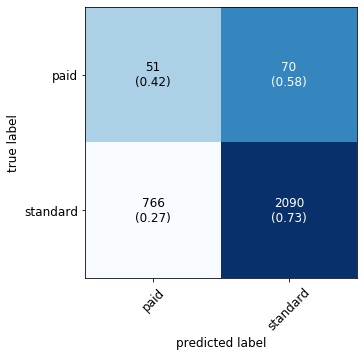

In [22]:
class_names = ['paid', 'standard']
font = {'size': 12}
matplotlib.rc('font', **font)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(5,5), class_names = class_names, show_normed=True)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.06      0.42      0.11       121
           1       0.97      0.73      0.83      2856

    accuracy                           0.72      2977
   macro avg       0.52      0.58      0.47      2977
weighted avg       0.93      0.72      0.80      2977



### Multinomial

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
clf = MultinomialNB().fit(X_train ,y_train)

In [26]:
y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8165938864628821


(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2e536a58>)

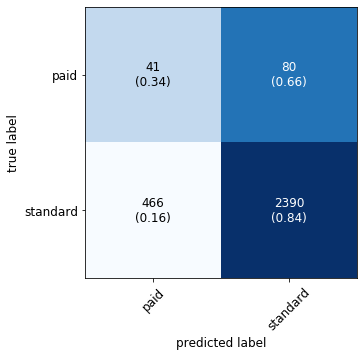

In [27]:
class_names = ['paid', 'standard']
font = {'size': 12}
matplotlib.rc('font', **font)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(5,5), class_names = class_names, show_normed=True)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.08      0.34      0.13       121
           1       0.97      0.84      0.90      2856

    accuracy                           0.82      2977
   macro avg       0.52      0.59      0.51      2977
weighted avg       0.93      0.82      0.87      2977



### Deep learning model

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
print(tf.__version__)

2.1.0


In [30]:
def create_model():
    model = Sequential()
    #model.add(Input(shape=(X_train.shape[1],), sparse=True))
    model.add(Dense(128, activation="relu", input_dim = X_train.shape[1]))
    #model.add(Dense(128, activation="relu"))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics=['accuracy'])
    
    return model

In [31]:
X_train.shape

(17128, 29809)

In [32]:
model = create_model()
history = model.fit(
    X_train.toarray(),
    y_train,
    batch_size = 10,
    epochs = 10,
    verbose = 1,
    validation_data=(X_test.toarray(), y_test)
)

Train on 17128 samples, validate on 2977 samples
Epoch 1/10
17128/17128 [==============================] - 27s 2ms/sample - loss: 0.3616 - accuracy: 0.8569 - val_loss: 0.4287 - val_accuracy: 0.7901
Epoch 2/10
17128/17128 [==============================] - 27s 2ms/sample - loss: 0.1882 - accuracy: 0.9300 - val_loss: 0.5089 - val_accuracy: 0.7901
Epoch 3/10
17128/17128 [==============================] - 25s 1ms/sample - loss: 0.1434 - accuracy: 0.9516 - val_loss: 0.6680 - val_accuracy: 0.7874
Epoch 4/10
17128/17128 [==============================] - 26s 1ms/sample - loss: 0.1294 - accuracy: 0.9543 - val_loss: 0.6904 - val_accuracy: 0.7911
Epoch 5/10
17128/17128 [==============================] - 25s 1ms/sample - loss: 0.1260 - accuracy: 0.9556 - val_loss: 0.7847 - val_accuracy: 0.7870
Epoch 6/10
17128/17128 [==============================] - 25s 1ms/sample - loss: 0.1238 - accuracy: 0.9561 - val_loss: 0.8414 - val_accuracy: 0.7867
Epoch 7/10
17128/17128 [==============================] -

In [33]:
y_pred = model.predict_classes(X_test.toarray())
accuracy_score(y_test, y_pred)

0.7746053073563991

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x120b60b00>)

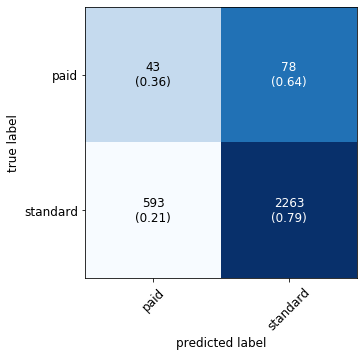

In [34]:
class_names = ['paid', 'standard']
font = {'size': 12}
matplotlib.rc('font', **font)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(5,5), class_names = class_names, show_normed=True)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.07      0.36      0.11       121
           1       0.97      0.79      0.87      2856

    accuracy                           0.77      2977
   macro avg       0.52      0.57      0.49      2977
weighted avg       0.93      0.77      0.84      2977

